# Continuously-observed: no event types

Let $\mathbb{Y} = \{ X(t_i) \}_{i}$ be observed data. The total birth rate from state $k$ is the sum of PW and HO rates 

$$
\lambda_{k}(\beta_1, \beta_2) = \beta_1 S_{k}^{(1)} + \beta_2 S_{k}^{(2)} = a_{k}(\beta_1) + b_{k}(\beta_2)
$$


In [1]:
import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.append('../src/')
sys.path.append('../scripts/')

from estimate_no_event_types import *
from simulate_gillespie import gillespie_sim_complete

## Setup

In [2]:
N = 1000
I0 = 10
time_max = 10.0
mu_true = 1.0

# true parameters for data generation 
# Case 1: "Balanced"
beta1_true, beta2_true = (2.4, 4.4)

# Case 2: low PW, high HO
# beta1_true, beta2_true = (1.4, 8.0)

# Case 3: high PW, low HO
# beta1_true, beta2_true = (3.7, 1.0)

# a harder case?
# betas pair giving trajectory that explores only narrow band of states k
# beta1_true, beta2_true = (1.8, 1)

# convert SCALED true betas to ORIGINAL per-interaction true betas
beta1_orig_true = beta1_true / N
beta2_orig_true = beta2_true / (N**2)

## Generate data

In [3]:
nsims = 1 # NOTE: single run
# TODO: try with 10, or even 100 runs

X_sims = []
for _ in range(nsims):
    X_t = gillespie_sim_complete(N, beta1_orig_true, beta2_orig_true, mu_true, I0, time_max)
    X_sims.append(X_t)

Plot saved to ../figures/inference/no_event_data.pdf


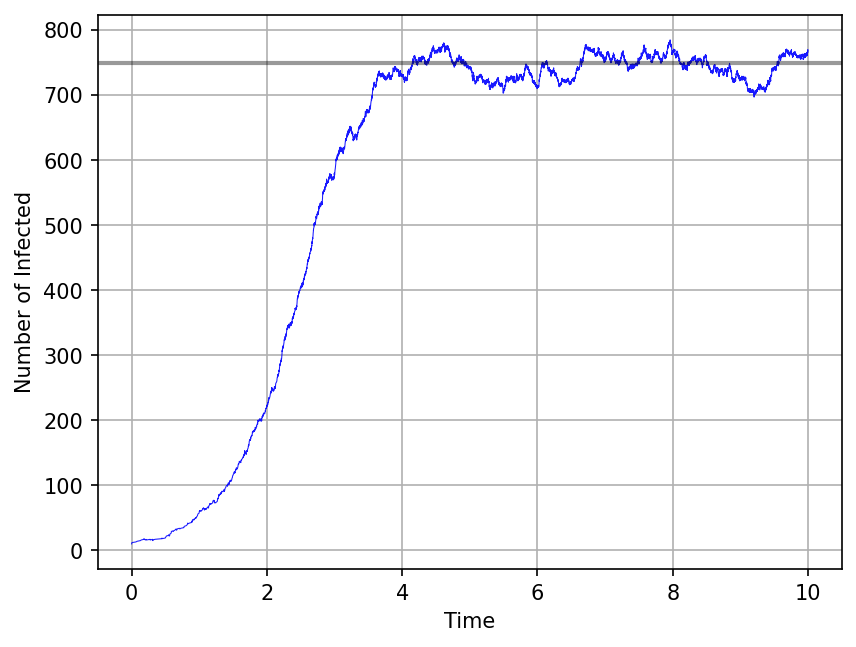

In [4]:
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()
ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)
plt.axhline(y=int(0.75 * N), color='black', lw=2, alpha=0.4, linestyle='-')
plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)

output_filename = "../figures/inference/no_event_data.pdf"
plt.savefig(output_filename, bbox_inches='tight')
print(f"Plot saved to {output_filename}")

plt.show()

In [5]:
# X_t = [t, waiting_time, total_infected, event_type, total_pw_count, total_ho_count]

## Sufficient (aggregated) statistics

- $B_k$: Total number of observed births from state $k$.
- $D_k$: Total number of observed deaths from state $k$.
- $T_k$: Total time spent in state $k$.

In [6]:
stats = get_sufficient_stats(X_t, N)

In [7]:
print(f"Total time spent in states:")
visited_k = np.where(stats['T_k'] > 0)[0]
for k in visited_k[:5]:
    print(f"  k={k}: T_k = {stats['T_k'][k]:.4f}")

print(f"\nTotal births from states:")
birth_k = np.where(stats['B_k'] > 0)[0]
for k in birth_k[:5]:
    print(f"  k={k}: B_k = {int(stats['B_k'][k])}")

print(f"\nTotal deaths from states:")
death_k = np.where(stats['D_k'] > 0)[0]
for k in death_k[:5]:
    print(f"  k={k}: D_k = {int(stats['D_k'][k])}")

Total time spent in states:
  k=10: T_k = 0.0025
  k=11: T_k = 0.0021
  k=12: T_k = 0.0598
  k=13: T_k = 0.0167
  k=14: T_k = 0.0478

Total births from states:
  k=10: B_k = 1
  k=11: B_k = 1
  k=12: B_k = 1
  k=13: B_k = 1
  k=14: B_k = 1

Total deaths from states:
  k=16: D_k = 1
  k=17: D_k = 4
  k=18: D_k = 1
  k=19: D_k = 1
  k=23: D_k = 1


## Likelihood 

$$
\ell(\beta_1, \beta_2) = \sum_{k = 0}^{N} \left[ B_k \ln(\lambda_k(\beta_1, \beta_2)) + D_k \ln(\mu_k(\mu)) - (\lambda_k(\beta_1, \beta_2) + \mu_k(\mu)) T_k \right]
$$

Create grid and plot the likelihood surface:

## Plotting

In [8]:
b1_range = (0, 6.0, 100)
b2_range = (0, 12.0, 100)
surface_data = compute_likelihood_surface(b1_range, b2_range, stats, N, mu_true)

Plot saved to ../figures/inference/no_event_log_likelihood_contour.pdf


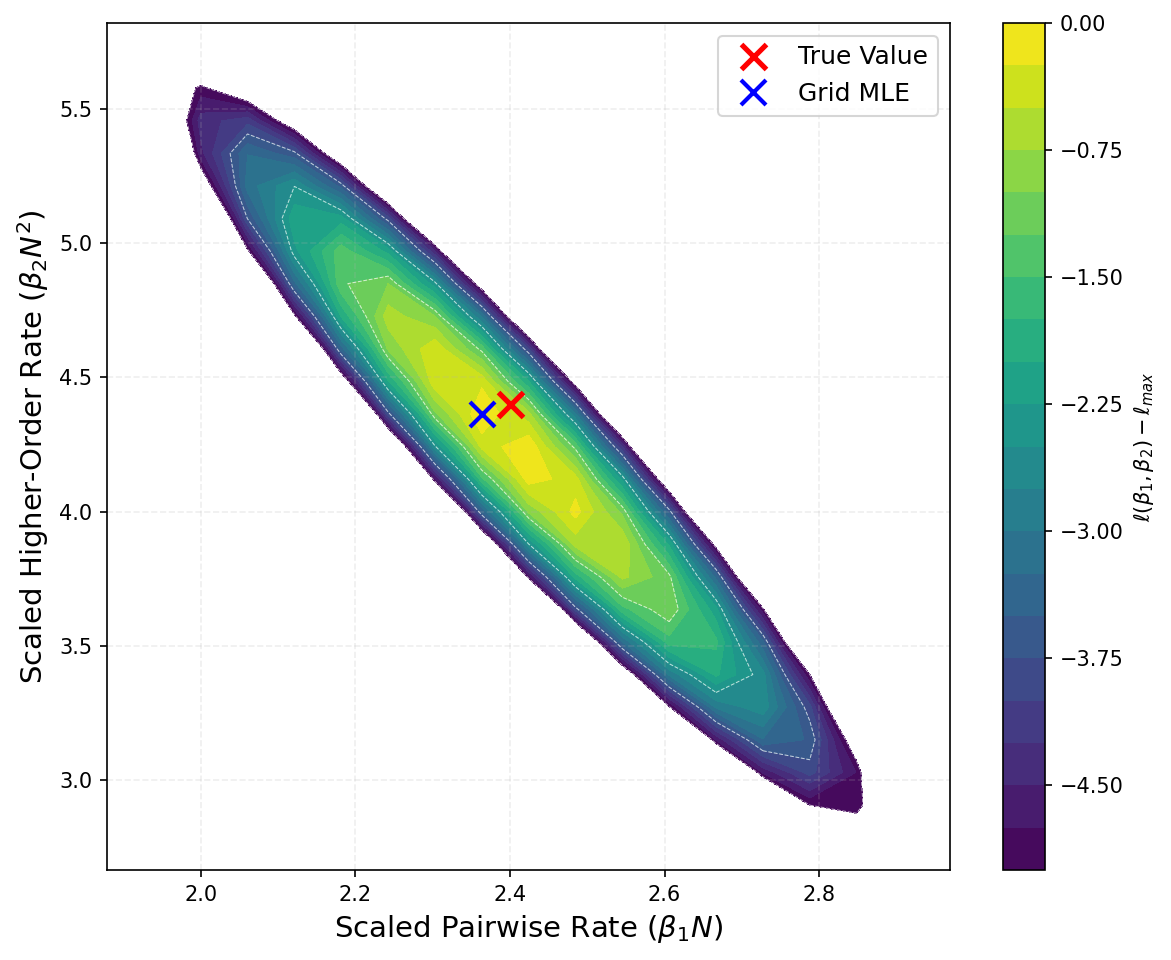

In [9]:
plot_zoomed_likelihood(surface_data, (beta1_true, beta2_true), threshold=-5.0)